# Error propagation: prior information

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import special

# Not really needed, but nicer plots
import seaborn as sns
sns.set()
sns.set_context("talk")

## Example 3.6.2 in Sivia
Consider $A = f^2$ problem, where $A = A_0 \pm \sigma_A$ from a least-squares fit to experimental data.

What is $f = f_0 \pm \sigma_f$?

In [4]:
def A_posterior(A,A0,sigA):
    pA = np.exp(-(A-A0)**2/(2*sigA**2))
    return pA/np.max(pA)

# Wrong analysis
def f_likelihood(f,A0,sigA):
    sigf = sigA / (2*np.sqrt(A0))
    pf = np.exp(-(f-np.sqrt(A0))**2/(2*sigf**2))
    return pf/np.max(pf)

# Correct error propagation
def f_posterior(f,A0,sigA):
    pf = f*np.exp(-(f**2-A0)**2/(2*sigA**2))
    return pf/np.max(pf)

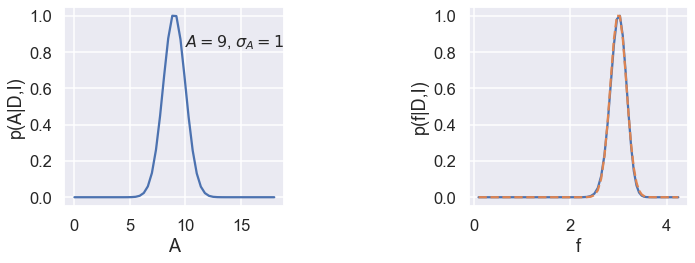

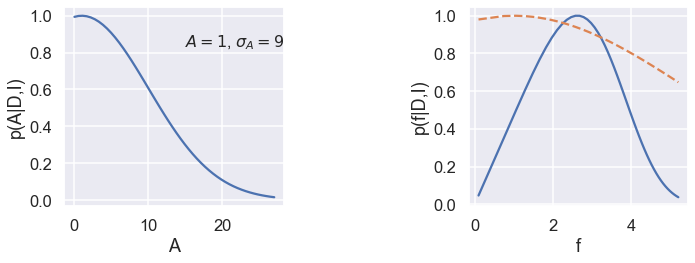

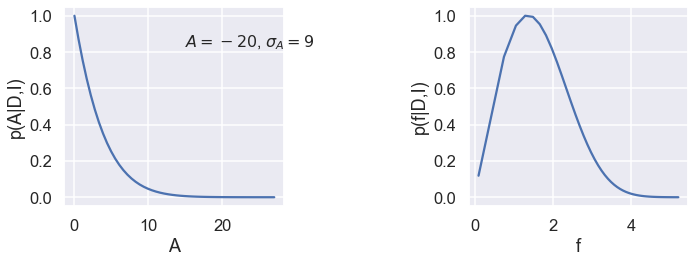

In [5]:
for (A0,sigA) in [(9,1),(1,9),(-20,9)]:
    maxA = max(2*A0,3*sigA)
    A_arr = np.linspace(0.01,maxA)
    f_arr = np.sqrt(A_arr)
    fig,ax = plt.subplots(1,2,figsize=(10,4))
    ax[0].plot(A_arr,A_posterior(A_arr,A0,sigA))
    ax[1].plot(f_arr,f_posterior(f_arr,A0,sigA))
    if A0>0:
        ax[1].plot(f_arr,f_likelihood(f_arr,A0,sigA),'--')
    ax[0].set(xlabel='A',ylabel='p(A|D,I)')
    plt.text(0.55,0.8,f'$A={A0}$, $\sigma_A={sigA}$', transform=ax[0].transAxes,fontsize=16)
    ax[1].set(xlabel='f',ylabel='p(f|D,I)')
    plt.tight_layout()
